In [7]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from dotenv import load_dotenv
import os
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

[nltk_data] Downloading package stopwords to C:\Users\Izzah
[nltk_data]     Karimah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
load_dotenv()

True

In [10]:
DB_URL = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
engine = create_engine(DB_URL)

In [11]:
query = "SELECT * FROM data_travel"
df = pd.read_sql(query, engine)

In [12]:
df.head()

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Pecatu, Badung Regency",Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,4 revi,150000,135000,kecak and fire dance performance at uluwatu te...,4,Layanan Wisata,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ungasan, Badung Regency",Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,1K revi,100000,79200,garuda wisnu kencana gwk cultural park tickets...,4,Layanan Wisata,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,3 revi,140000,112000,bal zoo tickets nikmat tualang seru satu alam ...,4,Layanan Wisata,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,6 revi,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Bedugul, Tabanan",Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,revi,125000,106250,bal farm house tickets rasa seru lupa alam alp...,4,Layanan Wisata,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gambar         2249 non-null   object 
 1   kota           2249 non-null   object 
 2   lokasi         2249 non-null   object 
 3   nama_wisata    2249 non-null   object 
 4   deskripsi      2249 non-null   object 
 5   rating         2249 non-null   float64
 6   ulasan         2249 non-null   object 
 7   harga_asli     2249 non-null   int64  
 8   harga_diskon   2249 non-null   int64  
 9   combined_text  2249 non-null   object 
 10  cluster        2249 non-null   int64  
 11  label          2249 non-null   object 
 12  prediksi       2249 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 228.5+ KB


In [14]:
print(df[['kota']].value_counts())

kota      
Bali          1291
Jakarta        586
Bandung        151
Yogyakarta     137
Malang          84
Name: count, dtype: int64


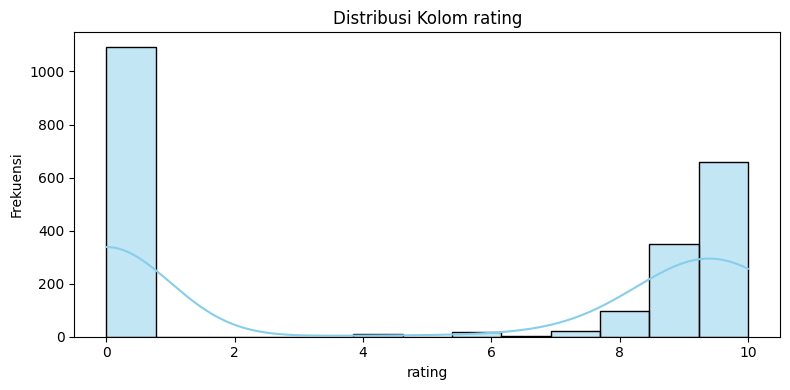

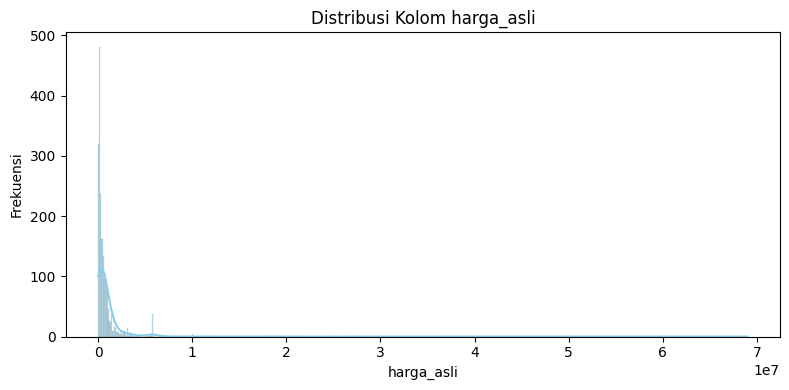

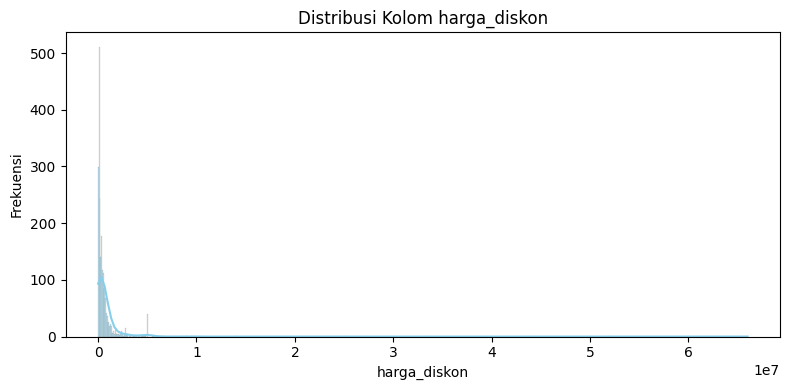

In [15]:
# Menampilkan distribusi (sebaran nilai) dari masing-masing kolom numerik
numeric_cols = ['rating', 'harga_asli', 'harga_diskon']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribusi Kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

C:\Users\Izzah Karimah\AppData\Local\Temp\ipykernel_3168\3369907500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='kota', order=df['kota'].value_counts().index, palette='coolwarm')


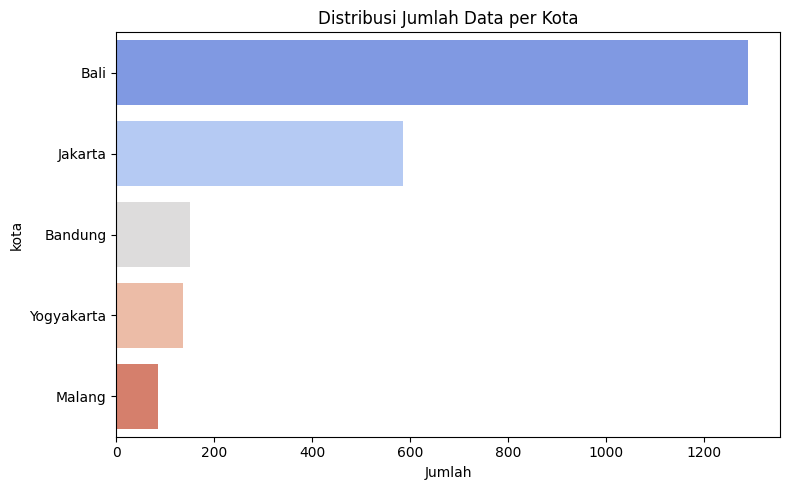

In [16]:
# Menampilkan distribusi jumlah data per kota
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='kota', order=df['kota'].value_counts().index, palette='coolwarm')
plt.title('Distribusi Jumlah Data per Kota')
plt.xlabel('Jumlah')
plt.ylabel('kota')
plt.tight_layout()
plt.show()

C:\Users\Izzah Karimah\AppData\Local\Temp\ipykernel_3168\2489966226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lokasi.values, y=top_lokasi.index, palette='pastel')


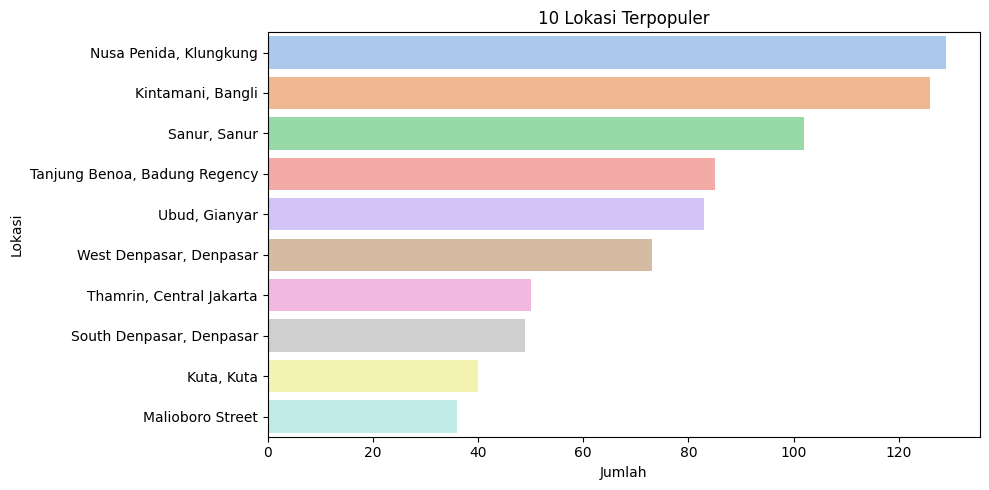

In [17]:
# Menampilkan 10 lokasi paling populer (paling sering muncul)
top_lokasi = df['lokasi'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_lokasi.values, y=top_lokasi.index, palette='pastel')
plt.title('10 Lokasi Terpopuler')
plt.xlabel('Jumlah')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

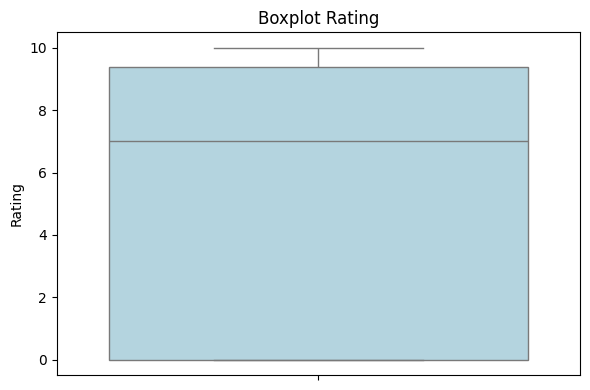

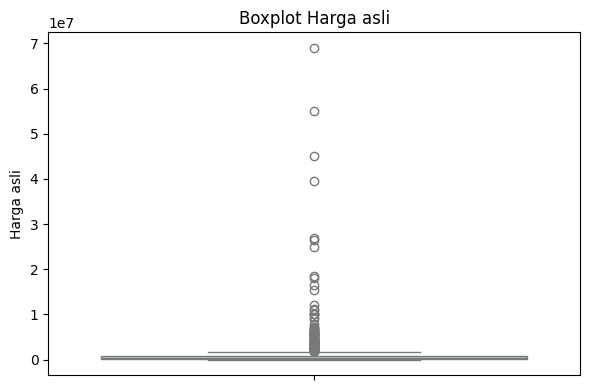

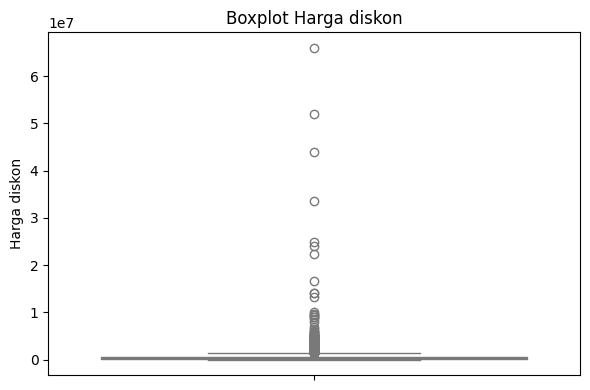

In [18]:
# Menampilkan boxplot untuk mendeteksi outlier dan memahami sebaran nilai p
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot {col.replace("_", " ").capitalize()}')
    plt.ylabel(col.replace("_", " ").capitalize())
    plt.tight_layout()
    plt.show()

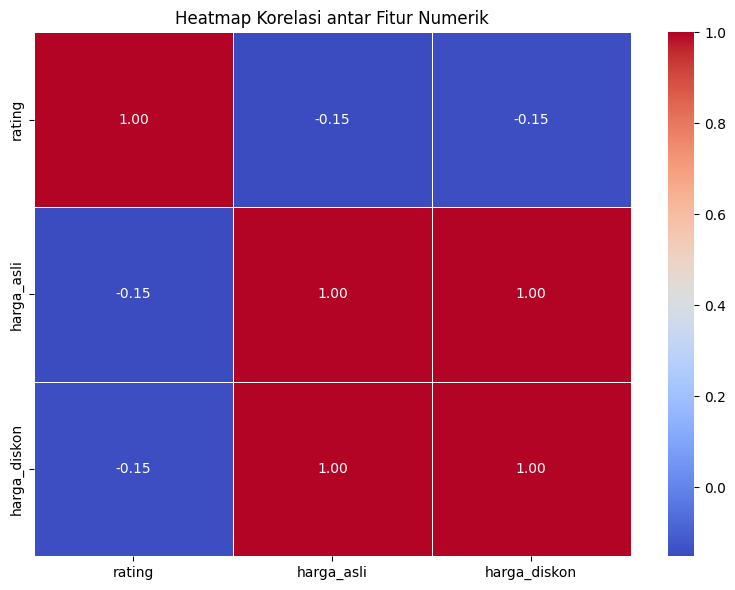

In [19]:
# Korelasi antar fitur numerik
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

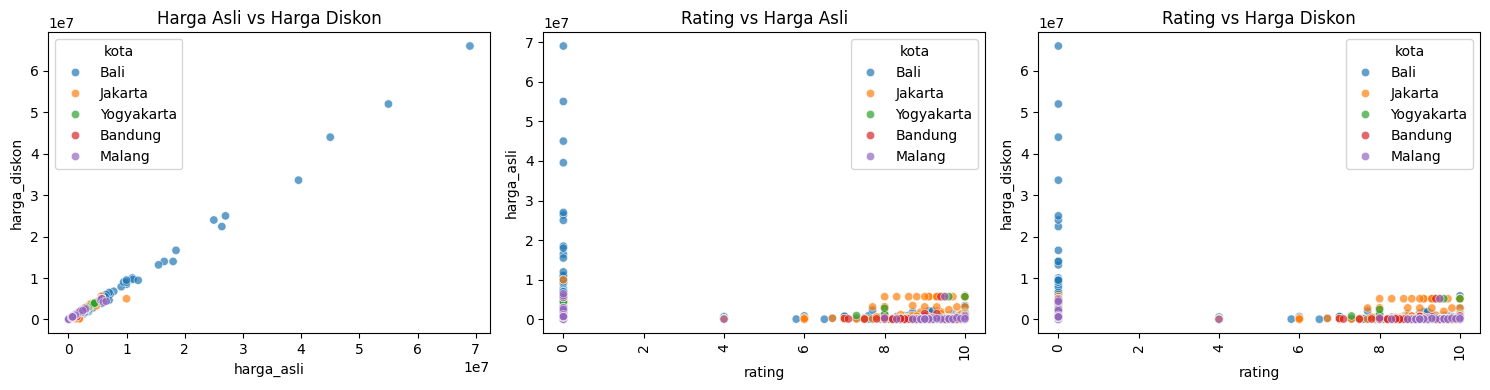

In [20]:
# Scatter plot rating vs harga asli dan harga diskon
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='harga_asli', y='harga_diskon', hue='kota', palette='tab10', alpha=0.7)
plt.title('Harga Asli vs Harga Diskon')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='rating', y='harga_asli', hue='kota', palette='tab10', alpha=0.7)
plt.title('Rating vs Harga Asli')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='rating', y='harga_diskon', hue='kota', palette='tab10', alpha=0.7)
plt.title('Rating vs Harga Diskon')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [21]:
# Mengubah tipe data untuk kolom 'Harga Asli' dan 'Harga diskon'
df['harga_asli'] = pd.to_numeric(df['harga_asli'], errors='coerce')
df['harga_diskon'] = pd.to_numeric(df['harga_diskon'], errors='coerce')

## Mengecek Missing Value

In [22]:
print(df.isnull().sum())

gambar           0
kota             0
lokasi           0
nama_wisata      0
deskripsi        0
rating           0
ulasan           0
harga_asli       0
harga_diskon     0
combined_text    0
cluster          0
label            0
prediksi         0
dtype: int64


## Mengecek Duplikasi Data

In [23]:
print(df.duplicated().sum())

0


## Menghapus Tanda Kurung di Kolom Ulasan




In [24]:
df['ulasan'] = df['ulasan'].apply(lambda x: x[1:-1])
df

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Pecatu, Badung Regency",Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,rev,150000,135000,kecak and fire dance performance at uluwatu te...,4,Layanan Wisata,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ungasan, Badung Regency",Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,K rev,100000,79200,garuda wisnu kencana gwk cultural park tickets...,4,Layanan Wisata,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,rev,140000,112000,bal zoo tickets nikmat tualang seru satu alam ...,4,Layanan Wisata,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,rev,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Bedugul, Tabanan",Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,rev,125000,106250,bal farm house tickets rasa seru lupa alam alp...,4,Layanan Wisata,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Malang,Lowokwaru,Bromo Midnight,Nikmati pesona alam Gunung Bromo dengan paket ...,0.0,v,1200000,1020000,bromo midnight nikmat pesona alam gunung bromo...,4,Layanan Wisata,0
2245,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Malang,Blimbing,Batu Fun Off road with Trail,Jelajahi alam Batu dengan cara seru melalui pe...,0.0,v,750000,700000,batu fun off road with trail jelajah alam batu...,4,Layanan Wisata,0
2246,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Malang,Singosari,Explore Toyomarto Tourism Village,Kunjungi desa wisata Toyomarto yang terletak d...,0.0,v,661250,575000,explore toyomarto tourism village kunjung desa...,4,Layanan Wisata,0
2247,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Malang,Kedungkandang,Tumpak Sewu Exciting Adventure 1 Day by Naraya...,Nikmati suasana pedesaan yang sejuk dengan lat...,0.0,v,690000,586500,tumpak sewu exciting adventure 1 day by naraya...,4,Layanan Wisata,0


## Text Normalization

### Lowercase

In [25]:
nama_wisata_lower  = df['nama_wisata'].str.lower()
deskripsi_lower  = df['deskripsi'].str.lower()

### Membersihkan Kolom Deskripsi

In [26]:
def clean_deskripsi(text):
    text = re.sub(r'http\S+', '', text) # Menghapus link
    text = re.sub(r'!', '', text) # Menghapus tanda seru '!'
    text = re.sub(r'\s+', ' ', text).strip() # Menghapus spasi
    text = re.sub(r'-+', '', text) # Menghapus tanda '--'
    return text

cleaned_deskripsi  = deskripsi_lower.apply(clean_deskripsi)
cleaned_deskripsi

0       nikmati pengalaman budaya yang memukau melalui...
1       rasakan pengalaman budaya bali yang lengkap di...
2       nikmati petualangan seru menyatu dengan alam d...
3       lepaskan penat dan manjakan diri anda di taman...
4       rasakan keseruan tak terlupakan di pengalaman ...
                              ...                        
2244    nikmati pesona alam gunung bromo dengan paket ...
2245    jelajahi alam batu dengan cara seru melalui pe...
2246    kunjungi desa wisata toyomarto yang terletak d...
2247    nikmati suasana pedesaan yang sejuk dengan lat...
2248    nikmati wisata alam yang luar biasa di air ter...
Name: deskripsi, Length: 2249, dtype: object

### Menghapus Stopword

In [27]:
stop_words = set(stopwords.words('indonesian'))

def remove_stop_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [28]:
cleaned_deskripsi = cleaned_deskripsi.apply(remove_stop_words)
cleaned_deskripsi

0       nikmati pengalaman budaya memukau pertunjukan ...
1       rasakan pengalaman budaya bali lengkap garuda ...
2       nikmati petualangan seru menyatu alam bali zoo...
3       lepaskan penat manjakan taman air spa salah sp...
4       rasakan keseruan terlupakan pengalaman alpaka ...
                              ...                        
2244    nikmati pesona alam gunung bromo paket tur bro...
2245    jelajahi alam batu seru petualangan offroad me...
2246    kunjungi desa wisata toyomarto terletak lereng...
2247    nikmati suasana pedesaan sejuk latar gunung se...
2248    nikmati wisata alam air terjun tumpak sewu kea...
Name: deskripsi, Length: 2249, dtype: object

In [29]:
cleaned_nama_wisata = nama_wisata_lower.apply(remove_stop_words)
cleaned_nama_wisata

0       kecak and fire dance performance at uluwatu te...
1          garuda wisnu kencana gwk cultural park tickets
2                                        bali zoo tickets
3                                      taman air spa kuta
4                                 bali farm house tickets
                              ...                        
2244                                       bromo midnight
2245                         batu fun off road with trail
2246                    explore toyomarto tourism village
2247    tumpak sewu exciting adventure 1 day by naraya...
2248                               tumpak sewu expedition
Name: nama_wisata, Length: 2249, dtype: object

### Tokenization

In [30]:
def tokenize_and_clean(text):
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for token in tokens:
        cleaned_token = re.sub(r'[()]', '', token)
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)

    return cleaned_tokens

In [31]:
nama_wisata_token = cleaned_nama_wisata.apply(tokenize_and_clean)
nama_wisata_token

0       [kecak, and, fire, dance, performance, at, ulu...
1       [garuda, wisnu, kencana, gwk, cultural, park, ...
2                                    [bali, zoo, tickets]
3                                 [taman, air, spa, kuta]
4                            [bali, farm, house, tickets]
                              ...                        
2244                                    [bromo, midnight]
2245                  [batu, fun, off, road, with, trail]
2246               [explore, toyomarto, tourism, village]
2247    [tumpak, sewu, exciting, adventure, 1, day, by...
2248                           [tumpak, sewu, expedition]
Name: nama_wisata, Length: 2249, dtype: object

In [32]:
deskripsi_token = cleaned_deskripsi.apply(tokenize_and_clean)
deskripsi_token

0       [nikmati, pengalaman, budaya, memukau, pertunj...
1       [rasakan, pengalaman, budaya, bali, lengkap, g...
2       [nikmati, petualangan, seru, menyatu, alam, ba...
3       [lepaskan, penat, manjakan, taman, air, spa, s...
4       [rasakan, keseruan, terlupakan, pengalaman, al...
                              ...                        
2244    [nikmati, pesona, alam, gunung, bromo, paket, ...
2245    [jelajahi, alam, batu, seru, petualangan, offr...
2246    [kunjungi, desa, wisata, toyomarto, terletak, ...
2247    [nikmati, suasana, pedesaan, sejuk, latar, gun...
2248    [nikmati, wisata, alam, air, terjun, tumpak, s...
Name: deskripsi, Length: 2249, dtype: object

### Stemming

In [33]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_list(tokens):
    stemmed = []
    for token in tokens:
        stemmed_token = stemmer.stem(token)
        stemmed.append(stemmed_token)
    return stemmed

In [34]:
nama_wisata_stemmed = nama_wisata_token.apply(stemming_list)
nama_wisata_stemmed

0       [kecak, and, fire, dance, performance, at, ulu...
1       [garuda, wisnu, kencana, gwk, cultural, park, ...
2                                     [bal, zoo, tickets]
3                                 [taman, air, spa, kuta]
4                             [bal, farm, house, tickets]
                              ...                        
2244                                    [bromo, midnight]
2245                  [batu, fun, off, road, with, trail]
2246               [explore, toyomarto, tourism, village]
2247    [tumpak, sewu, exciting, adventure, 1, day, by...
2248                           [tumpak, sewu, expedition]
Name: nama_wisata, Length: 2249, dtype: object

In [35]:
deskripsi_stemmed = deskripsi_token.apply(stemming_list)
deskripsi_stemmed

0       [nikmat, alam, budaya, pukau, tunjuk, kecak, t...
1       [rasa, alam, budaya, bal, lengkap, garuda, wis...
2       [nikmat, tualang, seru, satu, alam, bal, zoo, ...
3       [lepas, penat, manja, taman, air, spa, salah, ...
4       [rasa, seru, lupa, alam, alpaka, bal, sempurna...
                              ...                        
2244    [nikmat, pesona, alam, gunung, bromo, paket, t...
2245    [jelajah, alam, batu, seru, tualang, offroad, ...
2246    [kunjung, desa, wisata, toyomarto, letak, lere...
2247    [nikmat, suasana, desa, sejuk, latar, gunung, ...
2248    [nikmat, wisata, alam, air, terjun, tumpak, se...
Name: deskripsi, Length: 2249, dtype: object

# **TF-IDF**

In [36]:
def tokens_to_string(tokens):
    return ' '.join(tokens)

nama_wisata_stemmed_str = nama_wisata_stemmed.apply(tokens_to_string)
deskripsi_stemmed_str = deskripsi_stemmed.apply(tokens_to_string)

vectorizer = TfidfVectorizer()
tfidf_nama_wisata = vectorizer.fit_transform(nama_wisata_stemmed_str)
tfidf_deskripsi = vectorizer.fit_transform(deskripsi_stemmed_str)

In [37]:
df['combined_text'] = nama_wisata_stemmed_str + " " + deskripsi_stemmed_str
vectorizer = TfidfVectorizer()
tfidf_combined = vectorizer.fit_transform(df['combined_text'])

In [38]:
print("TF-IDF untuk nama_wisata:")
print(tfidf_nama_wisata.toarray().shape)
print(vectorizer.get_feature_names_out())

TF-IDF untuk nama_wisata:
(2249, 2263)
['00' '000' '0022' ... 'zoomoov' 'zoonior' 'zumba']


In [39]:
print("TF-IDF untuk deskripsi:")
print(tfidf_deskripsi.toarray().shape)
print(vectorizer.get_feature_names_out())

TF-IDF untuk deskripsi:
(2249, 6009)
['00' '000' '0022' ... 'zoomoov' 'zoonior' 'zumba']


In [40]:
print("TF-IDF untuk data kombinasi:")
print(tfidf_combined.toarray().shape)
print(vectorizer.get_feature_names_out())

TF-IDF untuk data kombinasi:
(2249, 6666)
['00' '000' '0022' ... 'zoomoov' 'zoonior' 'zumba']


# **Modeling**

In [41]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [42]:
# Menentukan parameter eps dan min_samples
eps_values = np.arange(0.1, 2.1, 0.1)
min_samples_values = range(3, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(tfidf_deskripsi)
        unique_labels = set(cluster_labels)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        num_noise = list(cluster_labels).count(-1)

        print(f"eps={eps}, min_samples={min_samples} -> Number of clusters: {num_clusters}, Number of noise points: {num_noise}")

eps=0.1, min_samples=3 -> Number of clusters: 22, Number of noise points: 2099
eps=0.1, min_samples=4 -> Number of clusters: 17, Number of noise points: 2114
eps=0.1, min_samples=5 -> Number of clusters: 15, Number of noise points: 2122
eps=0.1, min_samples=6 -> Number of clusters: 7, Number of noise points: 2162
eps=0.1, min_samples=7 -> Number of clusters: 3, Number of noise points: 2186
eps=0.1, min_samples=8 -> Number of clusters: 3, Number of noise points: 2186
eps=0.1, min_samples=9 -> Number of clusters: 2, Number of noise points: 2194
eps=0.2, min_samples=3 -> Number of clusters: 24, Number of noise points: 2090
eps=0.2, min_samples=4 -> Number of clusters: 18, Number of noise points: 2108
eps=0.2, min_samples=5 -> Number of clusters: 16, Number of noise points: 2117
eps=0.2, min_samples=6 -> Number of clusters: 7, Number of noise points: 2162
eps=0.2, min_samples=7 -> Number of clusters: 3, Number of noise points: 2186
eps=0.2, min_samples=8 -> Number of clusters: 3, Number of

## Build Model DBSCAN

In [43]:
dbscan = DBSCAN(eps=0.2, min_samples=9)
dbscan_labels = dbscan.fit_predict(tfidf_deskripsi)

label_counts = pd.Series(dbscan_labels).value_counts()
label_counts

-1    2194
 1      35
 0      20
Name: count, dtype: int64

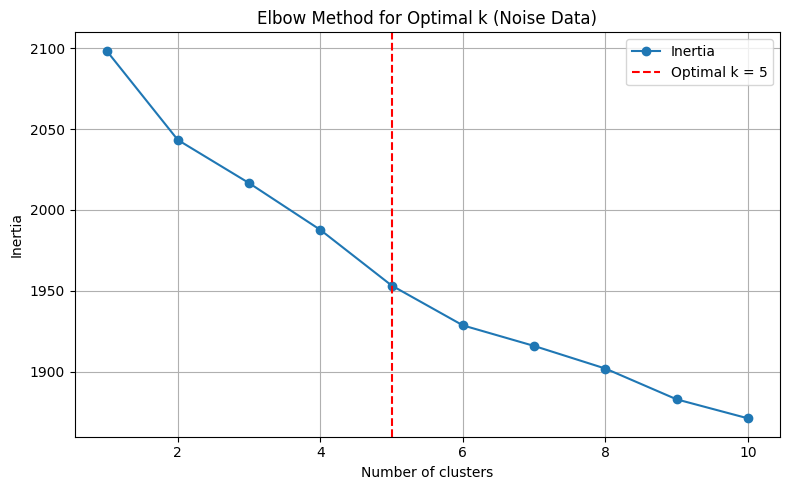

Optimal number of clusters (k) berdasarkan elbow: 5


In [44]:
tfidf_noise = tfidf_deskripsi[dbscan_labels == -1]

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_noise)
    inertia.append(kmeans.inertia_)

kneedle = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
k_optimal = kneedle.elbow

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', label='Inertia')
if k_optimal is not None:
    plt.axvline(x=k_optimal, color='red', linestyle='--', label=f'Optimal k = {k_optimal}')
plt.title('Elbow Method for Optimal k (Noise Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Optimal number of clusters (k) berdasarkan elbow: {k_optimal}")

## Build Model K-Means

In [45]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_noise)

combined_labels = dbscan_labels.copy()
noise_indices = np.where(combined_labels == -1)[0]

new_kmeans_labels = kmeans_labels + (max(dbscan_labels) + 1)
combined_labels[noise_indices] = new_kmeans_labels

df['cluster'] = combined_labels
print(df['cluster'].value_counts())

cluster
4    1301
5     297
3     226
2     219
6     151
1      35
0      20
Name: count, dtype: int64


In [46]:
df.head()

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Pecatu, Badung Regency",Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,rev,150000,135000,kecak and fire dance performance at uluwatu te...,4,Layanan Wisata,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ungasan, Badung Regency",Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,K rev,100000,79200,garuda wisnu kencana gwk cultural park tickets...,4,Layanan Wisata,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,rev,140000,112000,bal zoo tickets nikmat tualang seru satu alam ...,4,Layanan Wisata,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,rev,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Bedugul, Tabanan",Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,rev,125000,106250,bal farm house tickets rasa seru lupa alam alp...,4,Layanan Wisata,0


In [47]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 0
cluster_0 = df[df['cluster'] == 0][['kota', 'nama_wisata', 'cluster']]
cluster_0.sample(20)

,kota,nama_wisata,cluster
1796,Jakarta,ZAP Clinic Emporium Pluit Mall,0
1808,Jakarta,ZAP Clinic Citywalk Gajah Mada,0
1818,Jakarta,ZAP Clinic Lippo Mall Kemang,0
1777,Jakarta,ZAP Clinic Lotte Shopping Avenue,0
1813,Jakarta,ZAP Clinic Kota Bintang Bekasi,0
1778,Jakarta,ZAP Premiere Menteng,0
1785,Jakarta,ZAP Clinic Kalibata City Square,0
1804,Jakarta,ZAP Clinic Puri Indah Ruko,0
1795,Jakarta,ZAP Clinic Green Sedayu Mall,0
1824,Jakarta,ZAP Clinic Plaza Senayan,0


In [48]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 1
cluster_1 = df[df['cluster'] == 1][['kota', 'nama_wisata', 'cluster']]
cluster_1.sample(35)


,kota,nama_wisata,cluster
1867,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Le Bahrai ...,1
1827,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Türkiye (I...,1
1843,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Maldives (...,1
1812,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Worldwide,1
1858,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Canada (In...,1
1863,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Kuwait (In...,1
1819,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Europe (In...,1
1844,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Indonesia ...,1
1845,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Cambodia (...,1
1822,Jakarta,Pinjamwifi: Truly Unlimited Wi-Fi - Asia(Indon...,1


In [49]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 2
cluster_2 = df[df['cluster'] == 2][['kota', 'nama_wisata', 'cluster']]
cluster_2.sample(50)

,kota,nama_wisata,cluster
1087,Bali,East Nusa Penida Tour by Bali Funtasea - 1 Day,2
806,Bali,One Day Tour West + Snorkeling Nusa Penida by ...,2
1237,Bali,East Nusa Penida 1 Day Tour – Amazing Adventure,2
329,Bali,Private Tour in West Nusa Penida (Kelingking B...,2
1269,Bali,One Day Tour Nusa Lembongan,2
880,Bali,Bali & Nusa Penida Holiday 5 Days 4 Nights,2
242,Bali,Nusa Penida - Sanur Speedboat by Caspla Bali,2
1147,Bali,Nusa Penida/Best Penida Trip,2
1239,Bali,One Day Tour NUSA PENIDA With Massage & Dinner,2
110,Bali,West Nusa Penida Tour by Jatu Bali Tours,2


In [50]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 3
cluster_3 = df[df['cluster'] == 3][['kota', 'nama_wisata', 'cluster']]
cluster_3.sample(50)

,kota,nama_wisata,cluster
671,Bali,Spa Fantasia Head & Reflexology,3
1447,Jakarta,Five Star Reflexology Sunter,3
776,Bali,Minerva Relaxation Centre,3
662,Bali,Carla Spa Kartika Plaza Lama,3
775,Bali,Anggita Spa Wanasegara,3
43,Bali,Kokuo Reflexology Discovery Mall Kuta Bali,3
1532,Jakarta,Meiso Reflexology Gandaria City,3
2179,Malang,Kayuputih Family Reflexology Soehat,3
346,Bali,Mahottama Wellness & Retreat,3
916,Bali,Anggita Spa Petitenget,3


In [51]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 4
cluster_4 = df[df['cluster'] == 4][['kota', 'nama_wisata', 'cluster']]
cluster_4.sample(50)

,kota,nama_wisata,cluster
1660,Jakarta,United Kingdom Visa Application Service by Ore...,4
670,Bali,Besakih Day Tour,4
457,Bali,Beautiful Peninsula Island,4
1178,Bali,12 HOURS CITY TOUR IN BALI (INNOVA REBORN UNIT...,4
1965,Yogyakarta,"Paket Tour Jogja 1 Hari Goa Pindul, Sungai Oya...",4
616,Bali,Charter Privat Bali: Bebas Pilih Destinasi di ...,4
1926,Yogyakarta,Paket Tour Jogja 1 Hari Teras Kaca - Gumuk Pas...,4
641,Bali,Surfing Class Uluwatu Bali - By Alva Travelindo,4
459,Bali,Rafting di Sungai Ayung,4
2223,Malang,Bromo Tour 1 Day By idnTripper,4


In [52]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 5
cluster_5 = df[df['cluster'] == 5][['kota', 'nama_wisata', 'cluster']]
cluster_5.sample(50)

,kota,nama_wisata,cluster
2079,Bandung,Anata Salon Bojongsoang,5
2063,Bandung,Karadenta Clinic Katamso - Bandung,5
2111,Bandung,Venus Barbershop Abdul Rahman,5
1394,Jakarta,ZAP Clinic Grand Indonesia,5
1741,Jakarta,Yakson Beauty Indonesia,5
1669,Jakarta,DL Beauty Slim & Skin Care Tebet,5
1505,Jakarta,Irwan Team Lippo Puri Mall,5
2116,Bandung,Waxhaus Summarecon Mall Bandung,5
1392,Jakarta,Dandelion ID Pondok Indah,5
2161,Bandung,Mira Beauty Clinic Pasar Baru Trade Center,5


In [53]:
# Menampilkan hanya kolom Kota, Lokasi, dan Nama Wisata untuk cluster 6
cluster_6 = df[df['cluster'] == 6][['kota', 'nama_wisata', 'cluster']]
cluster_6.sample(50)

,kota,nama_wisata,cluster
1399,Jakarta,Kidzlandia Grand Indonesia,6
2032,Bandung,KidCity Buah Batu Bandung Tickets,6
2045,Bandung,Game Master Cihampelas Walk Top-Up Voucher,6
1493,Jakarta,Funworld Arion Mall,6
171,Bali,Jet Ski-Banana Boat - Parasailing Adventure by...,6
1366,Jakarta,Timezone Senayan Park,6
1535,Jakarta,Funworld Mal Ciputra Card Top-up,6
1329,Jakarta,Funworld Central Park Card Top-up,6
1735,Jakarta,Zoomoov Mall of Indonesia Tickets,6
1884,Yogyakarta,kidzooona Jogja City Mall Playground Tickets,6


## Labeling

In [54]:
stopwords_id = set(stopwords.words('indonesian'))
stopwords_en = set(stopwords.words('english'))
stop_words = list(stopwords_id.union(stopwords_en)) 

for c in df['cluster'].unique():
    texts = df[df['cluster'] == c]['deskripsi']
    vectorizer_labeling = TfidfVectorizer(stop_words=stop_words, max_features=5)
    X = vectorizer_labeling.fit_transform(texts)
    keywords = vectorizer_labeling.get_feature_names_out()
    print(f"Cluster {c} :", keywords)

d:\KULIAH\SEMESTER 4\PBL\TRAVEL\venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Cluster 4 : ['bali' 'menikmati' 'nikmati' 'pengalaman' 'perjalanan']
Cluster 3 : ['nikmati' 'perawatan' 'pijat' 'spa' 'tubuh']
Cluster 2 : ['beach' 'nikmati' 'nusa' 'penida' 'pulau']
Cluster 6 : ['anak' 'bermain' 'keluarga' 'permainan' 'seru']
Cluster 5 : ['berkualitas' 'kecantikan' 'kulit' 'perawatan' 'rambut']
Cluster 0 : ['bahan' 'klinik' 'perawatan' 'pilihan' 'zap']
Cluster 1 : ['aplikasi' 'internet' 'koneksi' 'liburan' 'nikmati']


In [55]:
## Menggabungkan cluster 0 dan 5
df['cluster'] = df['cluster'].replace({5: 0})

unique_labels = sorted(df['cluster'].unique())
label_mapping = {old: new for new, old in enumerate(unique_labels)}

df['cluster'] = df['cluster'].map(label_mapping)
df['cluster'].value_counts()

cluster
4    1301
0     317
3     226
2     219
5     151
1      35
Name: count, dtype: int64

0 >	Klinik Kecantikan   
1 >	Layanan Internet   
2	> Wisata Pantai  
3	> Spa dan Perawatan  
4	> Layanan Wisata       
5	>	Wahana Bermain Keluarga  

## Mapping Label

In [56]:
cluster_labels = {
    0: "Klinik Kecantikan",
    1: "Layanan Internet",
    2: "Wisata Pantai",
    3: "Spa dan Perawatan",
    4: "Layanan Wisata",
    5: "Wahana Bermain Keluarga"
}

df['label'] = df['cluster'].map(cluster_labels)
df.head()

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Pecatu, Badung Regency",Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,rev,150000,135000,kecak and fire dance performance at uluwatu te...,4,Layanan Wisata,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ungasan, Badung Regency",Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,K rev,100000,79200,garuda wisnu kencana gwk cultural park tickets...,4,Layanan Wisata,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,rev,140000,112000,bal zoo tickets nikmat tualang seru satu alam ...,4,Layanan Wisata,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,rev,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Bedugul, Tabanan",Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,rev,125000,106250,bal farm house tickets rasa seru lupa alam alp...,4,Layanan Wisata,0


In [57]:
# Ambil satu data per cluster
df_per_cluster = df.groupby("cluster").first().reset_index()
df_per_cluster[['cluster', 'nama_wisata', 'label']]

,cluster,nama_wisata,label
0,0,Miracle Ultimate Denpasar,Klinik Kecantikan
1,1,Pinjamwifi: Truly Unlimited Wi-Fi - Singapore ...,Layanan Internet
2,2,Bali Nusa Penida Private Tour - 11 Hours,Wisata Pantai
3,3,Taman Air Spa Kuta,Spa dan Perawatan
4,4,Kecak and Fire Dance Performance at Uluwatu Te...,Layanan Wisata
5,5,Top-up Kartu Timezone Level 21 Mall Denpasar,Wahana Bermain Keluarga


In [58]:
df.to_csv('data_travel.csv', index=False)
df.to_sql('data_travel', con=engine, index=False, if_exists='replace')

2249

In [59]:
df = pd.read_csv('data_travel.csv')
df.head()

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Pecatu, Badung Regency",Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,rev,150000,135000,kecak and fire dance performance at uluwatu te...,4,Layanan Wisata,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ungasan, Badung Regency",Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,K rev,100000,79200,garuda wisnu kencana gwk cultural park tickets...,4,Layanan Wisata,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,rev,140000,112000,bal zoo tickets nikmat tualang seru satu alam ...,4,Layanan Wisata,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,rev,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Bedugul, Tabanan",Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,rev,125000,106250,bal farm house tickets rasa seru lupa alam alp...,4,Layanan Wisata,0


# **Evalution Model and visualization**

---



In [60]:
X_dbscan = tfidf_deskripsi
dbscan_labels_eval = dbscan_labels.copy()
if -1 in dbscan_labels:
    dbscan_labels_eval[dbscan_labels_eval == -1] = dbscan_labels.max() + 1

X_combined = tfidf_deskripsi
labels_combined = combined_labels

# Menghitung Silhouette Score
silhouette_dbscan = silhouette_score(X_dbscan, dbscan_labels_eval)
silhouette_combined = silhouette_score(X_combined, labels_combined)

# Menghitung Davies-Bouldin Score
dbs_dbscan = davies_bouldin_score(X_dbscan.toarray(), dbscan_labels_eval)
dbs_combined = davies_bouldin_score(X_combined.toarray(), labels_combined)

comparison_scores = pd.DataFrame({
    'Clustering Method': ['DBSCAN', 'Kombinasi DBSCAN + KMeans'],
    'Silhouette Score': [silhouette_dbscan, silhouette_combined],
    'Davies-Bouldin Score': [dbs_dbscan, dbs_combined]
})

comparison_scores

,Clustering Method,Silhouette Score,Davies-Bouldin Score
0,DBSCAN,0.013599,0.999103
1,Kombinasi DBSCAN + KMeans,0.038855,3.380286


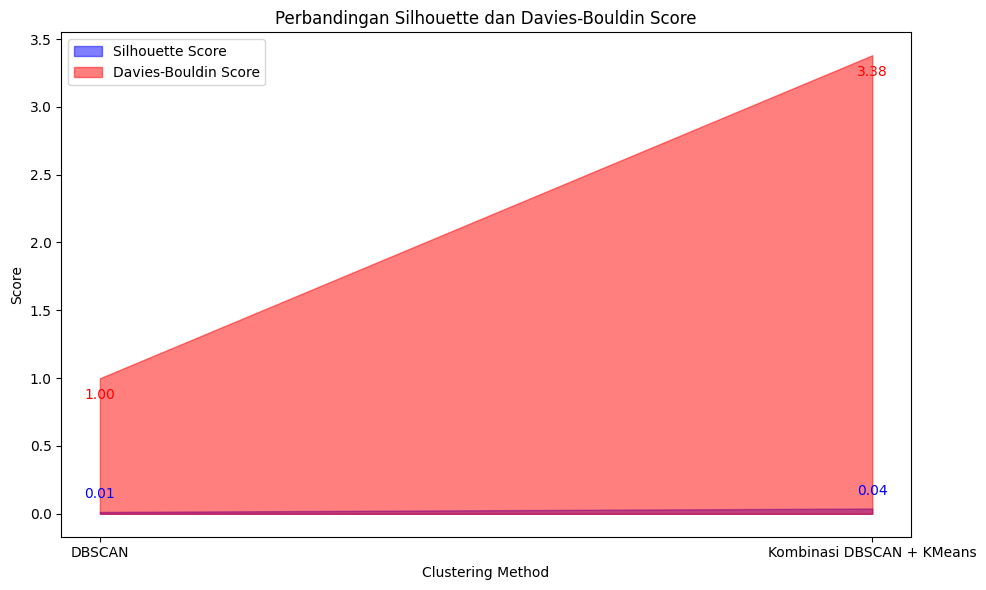

In [61]:
methods = ['DBSCAN', 'Kombinasi DBSCAN + KMeans']
silhouette_scores = [silhouette_dbscan, silhouette_combined]
db_scores = [dbs_dbscan, dbs_combined]

fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(methods, silhouette_scores, color='b', alpha=0.5, label='Silhouette Score')
ax.fill_between(methods, db_scores, color='r', alpha=0.5, label='Davies-Bouldin Score')

for i, txt in enumerate(silhouette_scores):
    ax.annotate(f'{txt:.2f}', (methods[i], silhouette_scores[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for i, txt in enumerate(db_scores):
    ax.annotate(f'{txt:.2f}', (methods[i], db_scores[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='red')

ax.set_xlabel('Clustering Method')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Silhouette dan Davies-Bouldin Score')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

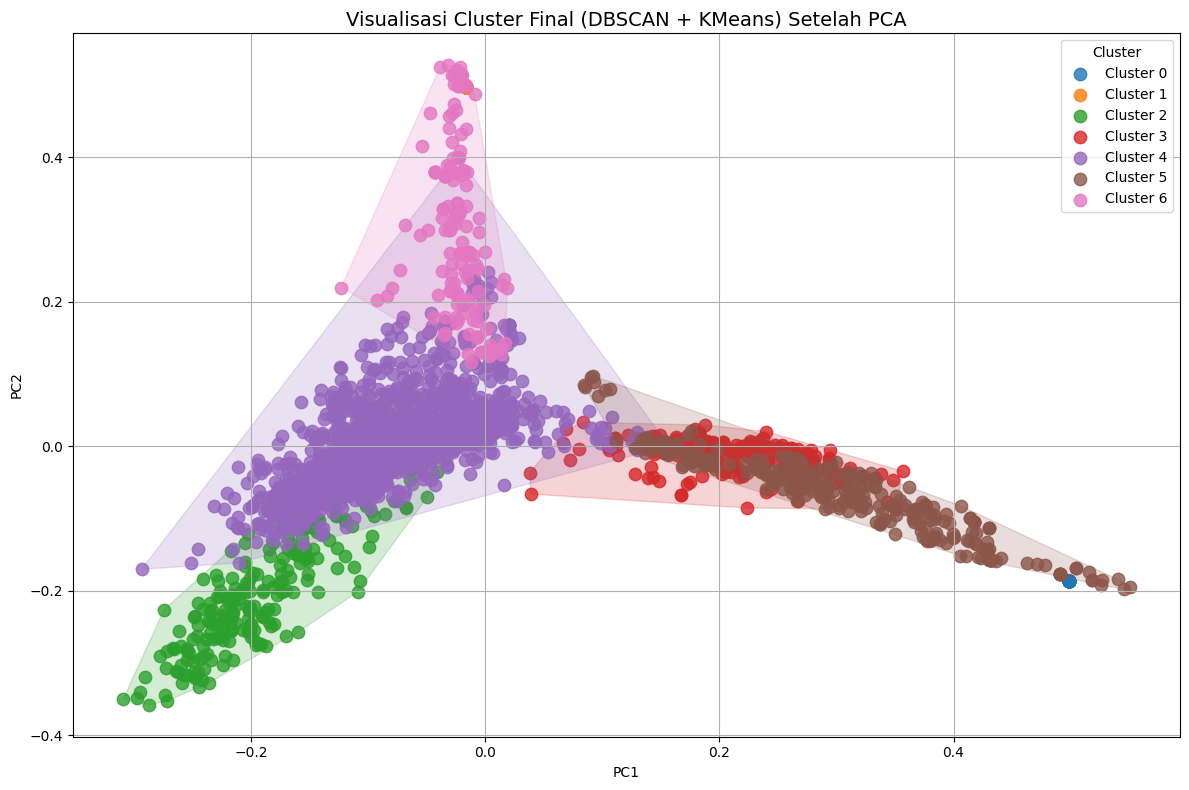

In [62]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined.toarray())  # Karena X_combined = tfidf_deskripsi (sparse matrix)

# Buat DataFrame untuk visualisasi
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels_combined  # Dari hasil gabungan DBSCAN + KMeans

# ===== Visualisasi PCA =====
plt.figure(figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
unique_clusters = sorted(pca_df['Cluster'].unique())

for i, cluster in enumerate(unique_clusters):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'],
                label=f'Cluster {cluster}', s=80, alpha=0.8,
                color=colors[i % len(colors)])

    if len(cluster_points) > 2:
        try:
            hull = ConvexHull(cluster_points[['PC1', 'PC2']].values)
            hull_vertices = cluster_points.iloc[hull.vertices]
            plt.fill(hull_vertices['PC1'], hull_vertices['PC2'],
                     color=colors[i % len(colors)], alpha=0.2)
        except:
            pass

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi Cluster Final (DBSCAN + KMeans) Setelah PCA', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
import plotly.express as px

pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_combined.toarray())
pca_3d_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster'] = labels_combined

fig = px.scatter_3d(pca_3d_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3'},
                    title='Visualisasi Cluster Final (DBSCAN + KMeans) Setelah PCA 3D')

fig.write_html("pca_3d_cluster.html")

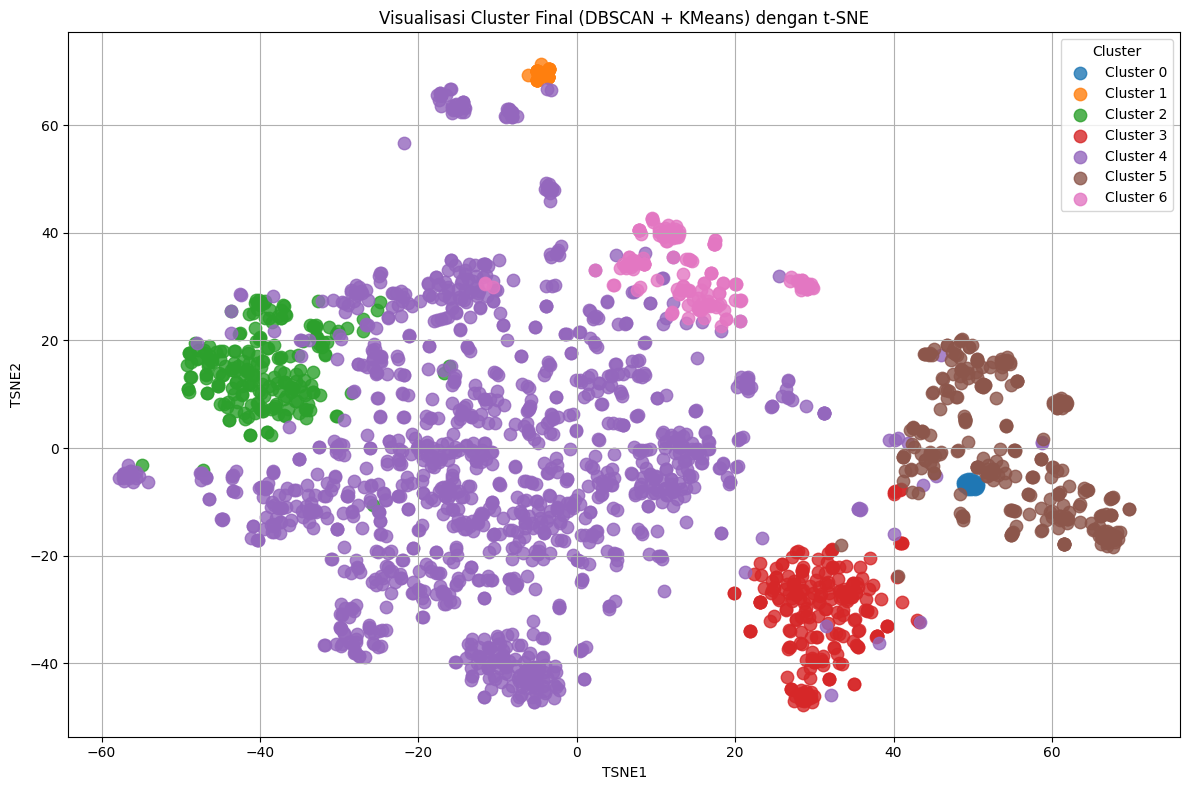

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_combined.toarray())

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels_combined

plt.figure(figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())

for i, cluster in enumerate(sorted(tsne_df['Cluster'].unique())):
    points = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(points['TSNE1'], points['TSNE2'],
                color=colors[i % len(colors)], label=f'Cluster {cluster}', s=80, alpha=0.8)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Visualisasi Cluster Final (DBSCAN + KMeans) dengan t-SNE')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

d:\KULIAH\SEMESTER 4\PBL\TRAVEL\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

d:\KULIAH\SEMESTER 4\PBL\TRAVEL\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\KULIAH\SEMESTER 4\PBL\TRAVEL\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



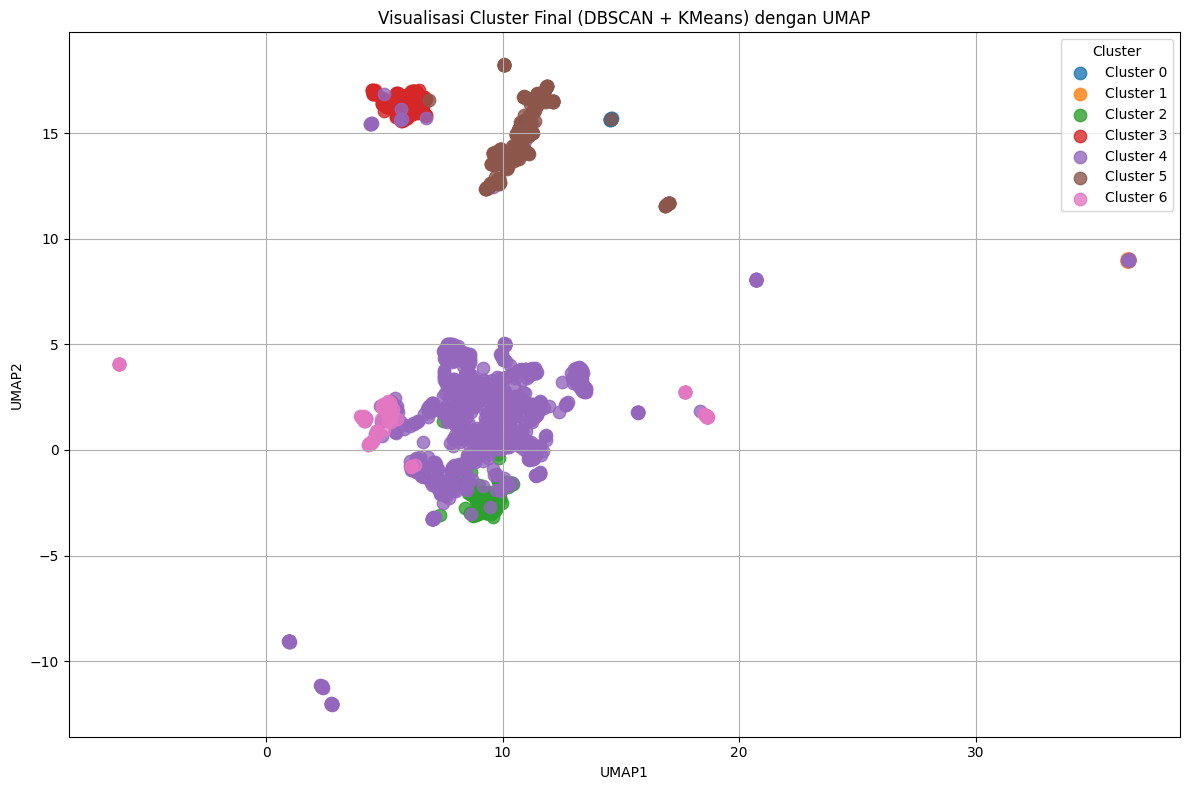

In [65]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_combined.toarray())

umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = labels_combined

plt.figure(figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())

for i, cluster in enumerate(sorted(umap_df['Cluster'].unique())):
    points = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(points['UMAP1'], points['UMAP2'],
                color=colors[i % len(colors)], label=f'Cluster {cluster}', s=80, alpha=0.8)

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('Visualisasi Cluster Final (DBSCAN + KMeans) dengan UMAP')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
def preprocess_text(text):
    if not text:
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
def get_recommendations(keyword, top_n=20, min_budget=None, max_budget=None, 
                        min_rating=None, kota=None, kategori=None):
    preprocessed_keyword = preprocess_text(keyword)
    matches = df[df['nama_wisata'].str.lower().str.contains(preprocessed_keyword)]
    if not matches.empty:
        filtered_data = matches
    else:
        keyword_vector = vectorizer.transform([preprocessed_keyword])
        cosine_similarities = cosine_similarity(keyword_vector, tfidf_matrix).flatten()
        similarity_scores = list(enumerate(cosine_similarities))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        top_indices = [i for i, score in similarity_scores if score > 0]
        filtered_data = df.iloc[top_indices]
    if min_budget is not None:
        filtered_data = filtered_data[filtered_data['harga_diskon'] >= min_budget]
    if max_budget is not None:
        filtered_data = filtered_data[filtered_data['harga_diskon'] <= max_budget]
    if min_rating is not None:
        filtered_data = filtered_data[filtered_data['rating'] >= min_rating]
    if kota is not None:
        filtered_data = filtered_data[filtered_data['kota'].str.lower() == kota.lower()]
    if kategori is not None:
        kategori_lower = kategori.lower()
        filtered_data = filtered_data[filtered_data['label'].str.lower().str.contains(kategori_lower)]
    filtered_data = filtered_data.head(top_n)

    if filtered_data.empty:
        print("Tidak ada hasil yang sesuai dengan filter yang diterapkan")
        return pd.DataFrame()
    return filtered_data.reset_index(drop=True)
hasil = get_recommendations('spa', top_n=10, min_budget=100000, max_budget=500000, min_rating=8, kota='Bali', kategori='Spa dan Perawatan')
hasil

,gambar,kota,lokasi,nama_wisata,deskripsi,rating,ulasan,harga_asli,harga_diskon,combined_text,cluster,label,prediksi
0,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,rev,280000,200000,taman air spa kuta lepas penat manja taman air...,3,Spa dan Perawatan,0
1,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Legian, Kuta",Reborn Signature Wellness Spa Dewi Sri Bali,Segarkan tubuh dan pikiran Anda di Reborn Sign...,9.3,rev,168000,126990,reborn signature wellness spa dewi sri bal seg...,3,Spa dan Perawatan,0
2,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",LLuvia Spa,Manjakan diri Anda dengan relaksasi di LLuvia ...,9.7,rev,400000,162425,lluvia spa manja relaksasi lluvia spa kuta bal...,3,Spa dan Perawatan,0
3,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Avenue Spa,Manjakan diri Anda dengan perawatan spa di Ave...,8.9,rev,160000,143980,avenue spa manja awat spa avenue spa kuta leta...,3,Spa dan Perawatan,0
4,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Ubud, Gianyar",Sanctoo Spa & Wellness,Nikmati perawatan istimewa dari Sanctoo Spa an...,9.7,rev,181500,145200,sanctoo spa wellness nikmat awat istimewa sanc...,3,Spa dan Perawatan,0
5,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Jimbaran, Badung Regency",Hua Spa Jimbaran,Nikmati perawatan spa dan pijat mewah di HUA S...,8.6,ev,430000,157000,hua spa jimbaran nikmat awat spa pijat mewah h...,3,Spa dan Perawatan,0
6,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Seminyak, Kuta",Melah Spa at Jambuluwuk Oceano Seminyak Hotel,Rasakan relaksasi dengan perawatan memanjakan ...,9.3,ev,300000,130000,lah spa at jambuluwuk oceano minyak hotel rasa...,3,Spa dan Perawatan,0
7,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Kuta, Kuta",Carla Spa Pantai Kuta,Patahkan rutinitas harian Anda dan hilangkan s...,9.2,rev,138000,120000,carla spa pantai kuta patah rutinitas hari hil...,3,Spa dan Perawatan,0
8,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sanur, Sanur",Smita Spa at Artotel Sanur Bali,Manjakan diri Anda dengan perawatan spa berkua...,10.0,v,390000,195000,smita spa at artotel sanur bal manja awat spa ...,3,Spa dan Perawatan,0
9,https://ik.imagekit.io/tvlk/xpe-asset/AyJ40ZAo...,Bali,"Sunset Road Bali, Kuta",Refresh Foot Reflexology & Massage Spa Kuta Bali,Manjakan diri Anda dengan perawatan menyegarka...,8.9,ev,130000,110500,refresh foot reflexology massage spa kuta bal ...,3,Spa dan Perawatan,0


In [ ]:
keywords = ['spa', 'funworld']
for kw in keywords:
    print(f"Evaluasi untuk keyword: {kw}")
    df['prediksi'] = df['combined_text'].apply(lambda x: 1 if kw in str(x).lower() else 0)
    if kw == 'spa':
        df['evaluasi'] = df['cluster'].apply(lambda x: 1 if x == 3 else 0)
    elif kw == 'funworld':
        df['evaluasi'] = df['cluster'].apply(lambda x: 1 if x == 5 else 0)
    TP = ((df['prediksi'] == 1) & (df['evaluasi'] == 1)).sum()
    FP = ((df['prediksi'] == 1) & (df['evaluasi'] == 0)).sum()
    FN = ((df['prediksi'] == 0) & (df['evaluasi'] == 1)).sum()
    TN = ((df['prediksi'] == 0) & (df['evaluasi'] == 0)).sum()
    presisi = TP / (TP + FP) if (TP + FP) > 0 else 0
    akurasi = (TP + TN) / len(df)
    print(f"Presisi: {presisi:.2f}")
    print(f"Akurasi: {akurasi:.2f}")
    print("-" * 30)


Evaluasi untuk keyword: spa
Presisi: 0.76
Akurasi: 0.95
------------------------------
Evaluasi untuk keyword: funworld
Presisi: 1.00
Akurasi: 0.95
------------------------------


In [ ]:
data = df[['kota', 'nama_wisata', 'deskripsi', 'rating', 'harga_asli', 'harga_diskon', 'ulasan','cluster', 'label']]
data

,kota,nama_wisata,deskripsi,rating,harga_asli,harga_diskon,ulasan,cluster,label
0,Bali,Kecak and Fire Dance Performance at Uluwatu Te...,Nikmati pengalaman budaya yang memukau melalui...,9.5,150000,135000,74 revie,4,Layanan Wisata
1,Bali,Garuda Wisnu Kencana (GWK) Cultural Park Tickets,Rasakan pengalaman budaya Bali yang lengkap di...,9.0,100000,79200,.1K revie,4,Layanan Wisata
2,Bali,Bali Zoo Tickets,Nikmati petualangan seru menyatu dengan alam d...,9.0,140000,112000,73 revie,4,Layanan Wisata
3,Bali,Taman Air Spa Kuta,Lepaskan penat dan manjakan diri Anda di Taman...,9.7,280000,200000,36 revie,3,Spa dan Perawatan
4,Bali,Bali Farm House Tickets,Rasakan keseruan tak terlupakan di pengalaman ...,9.4,125000,106250,4 revie,4,Layanan Wisata
...,...,...,...,...,...,...,...,...,...
2244,Malang,Bromo Midnight,Nikmati pesona alam Gunung Bromo dengan paket ...,0.0,1200000,1020000,revie,4,Layanan Wisata
2245,Malang,Batu Fun Off road with Trail,Jelajahi alam Batu dengan cara seru melalui pe...,0.0,750000,700000,revie,4,Layanan Wisata
2246,Malang,Explore Toyomarto Tourism Village,Kunjungi desa wisata Toyomarto yang terletak d...,0.0,661250,575000,revie,4,Layanan Wisata
2247,Malang,Tumpak Sewu Exciting Adventure 1 Day by Naraya...,Nikmati suasana pedesaan yang sejuk dengan lat...,0.0,690000,586500,revie,4,Layanan Wisata


In [ ]:
os.makedirs('model', exist_ok=True)
pickle.dump(vectorizer, open('model/tfidf_model.pkl', 'wb'))
pickle.dump(tfidf_combined, open('model/tfidf_matrix.pkl', 'wb'))
df.to_pickle('model/data_wisata.pkl')
print("Model dan data berhasil disimpan.")

Model dan data berhasil disimpan.
